(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)
Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


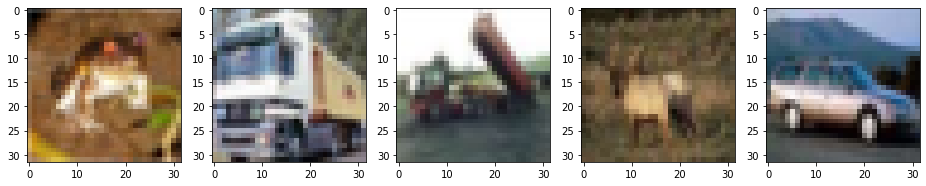

Example testing images and their labels: [3, 8, 8, 0, 6]
Corresponding classes for the labels: ['cat', 'ship', 'ship', 'airplane', 'frog']


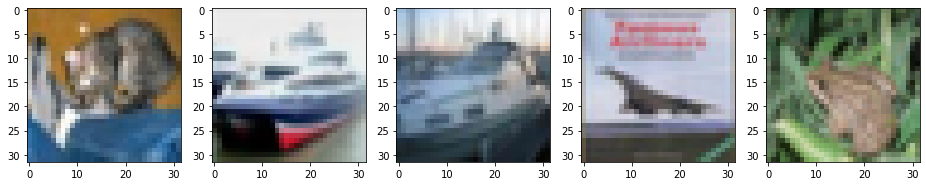

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 10s - loss: 1.8348 - accuracy: 0.3361 - val_loss: 1.7366 - val_accuracy: 0.3762
Epoch 2/50
 - 11s - loss: 1.6801 - accuracy: 0.3991 - val_loss: 1.6462 - val_accuracy: 0.4177
Epoch 3/50
 - 10s - loss: 1.6086 - accuracy: 0.4242 - val_loss: 1.5726 - val_accuracy: 0.4453
Epoch 4/50
 - 10s - loss: 1.5621 - accuracy: 0.4399 - val_loss: 1.5968 - val_accuracy: 0.4353
Epoch 5/50
 - 10s - loss: 1.5250 - accuracy: 0.4526 - val_loss: 1.5552 - val_accuracy: 0.4405
Epoch 6/50
 - 10s - loss: 1.4973 - accuracy: 0.4636 - val_loss: 1.6102 - val_accuracy: 0.4312
Epoch 7/50
 - 10s - loss: 1.4737 - accuracy: 0.4688 - val_loss: 1.5525 - val_accuracy: 0.4444
Epoch 8/50
 - 11s - loss: 1.4532 - accuracy: 0.4787 - val_loss: 1.5389 - val_accuracy: 0.4545
Epoch 9/50
 - 10s - loss: 1.4317 - accuracy: 0.4855 - val_loss: 1.5540 - val_accuracy: 0.4531
Epoch 10/50
 - 10s - loss: 1.4120 - accuracy: 0.4939 - val_loss: 1.5128 - val_accuracy: 0.4615
Epoch 11/

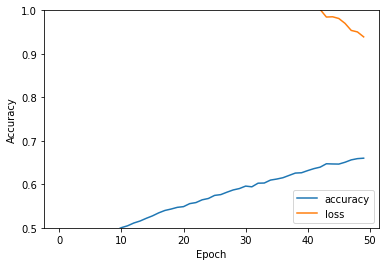

In [0]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()


print('Example testing images and their labels: ' + str([x[0] for x in y_test[0:5]]))
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_test[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_test[i]
    axarr[i].imshow(img)
plt.show()

# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255


from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.2)


score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names)
print(score)

# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

# Print our model's predictions.
print("These are the model predictions :")
print(np.argmax(predictions, axis=1)) #  [5 8 8 8 4]  ; dynamically will change
print("\n")

# Check our predictions against the ground truths.
print("These are the corresponding labels :")
print(y_test[:5])
testing = y_test[:5]
print(np.argmax(testing, axis =1)) #  [3 8 8 0 6]  ; dynamically will change depends on the model
print("\n")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')





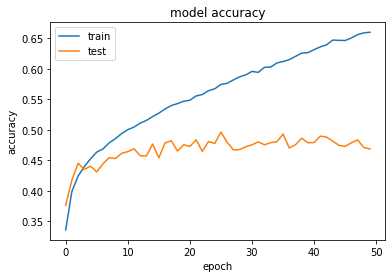

In [0]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()